In [4]:
# varBC time series 
# read compiled varbc stats from 
# <sensor>_<sat>_<ch>_{angle, chloud, emissivity, cloud, global_offset, obs_num, total_bc}
# initial built: 2024/08/05
# modified: 2024/09/25

# Update 2025/01/08:
# This script has been transformed into py file
# located at 
# /scratch2/GFDL/gfdlscr/Chih-Chi.Hu/varbc_coeff/plot_varbc_timeseries/*driver and *temp.py

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [10]:
root='/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/varbc_coeff/compiled_stats'

#exps = ['full_CTRL', 'full_only_clr_clr', 'full_clr_clr_and_cld_cld_0.05']
'''
exps = ['full_CTRL', 'full_clr_clr_and_cld_cld_0.05' ,
        'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc',
        'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_clwnbc']
'''
#exps = ['full_CTRL', 'full_CTRL_noinf']
'''
exps=['full_clr_clr_and_cld_cld_0.05', 'full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld_clwnbc', \
      'full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld_tri_clwnbc']
'''

#exps = ['full_CTRL', 'full_clr_clr_and_cld_cld_0.05','full_only_clr_clr']

exps = ['full_CTRL', 'full_CTRL_noinf']

short_name = {'full_clr_clr_and_cld_cld_0.05': 'clr_cld', \
              'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc': 'full_sym', \
              'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_clwnbc': 'full_sym_clwnbc', \
              'full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld': 'full_obs', \
              'full_clr_clr_and_cld_cld_0.05_varbcpred_model_cld_nobc': 'full_model', \
              'full_ctrl': 'all', \
              'full_CTRL': 'CTRL', \
              'full_CTRL_noinf': 'CTRL (noinf)',\
              'full_only_clr_clr': 'clr'}

#sensor='amsua_n15'
#sensor='amsua_n19'
sensor='atms_n20'
chanl ='ch1'

fn_prefix = f'{sensor}_{chanl}'

fn_global_offset={};
fn_total_bc={};
fn_varbc_norminc={};
fn_obs_num={};
fn_cloud={};
fn_angle={};
fn_emiss={};

for exp in exps:
    if exp.startswith(('clr_clr_and_cld_cld_0.05_varbcpred','full_clr_clr_and_cld_cld_0.05_varbcpred')):
        fn_cloud[exp]=f'{root}/{exp}/{fn_prefix}_cloud'
    
    fn_global_offset[exp] = f'{root}/{exp}/{fn_prefix}_global_offset'
    fn_total_bc[exp]      = f'{root}/{exp}/{fn_prefix}_total_bc'
    fn_varbc_norminc[exp] = f'{root}/{exp}/{fn_prefix}_varbc_norminc'
    fn_obs_num[exp]       = f'{root}/{exp}/{fn_prefix}_obs_num'
    fn_angle[exp]         = f'{root}/{exp}/{fn_prefix}_angle'
    fn_emiss[exp]         = f'{root}/{exp}/{fn_prefix}_emissivity'

In [11]:
# read timeseries
datetime=[];
total_bc_inc={};
total_bc_inc_sea={};
total_bc_inc_land={};

varbc_norminc={};
varbc_norminc_sea={};
varbc_norminc_land={};

global_offset={};
global_offset_var={};
obs_num_total={};
obs_num_varbc={};
cloud_pred={};
cloud_pred_var={};

n_cloud_pred = 4 # number of cloud predictors

for i, exp in enumerate(exps):
    
    total_bc_inc[exp]     = [];
    total_bc_inc_sea[exp] = [];
    total_bc_inc_land[exp] = [];
    
    varbc_norminc[exp]     = [];
    varbc_norminc_sea[exp] = [];
    varbc_norminc_land[exp]= [];
    
    global_offset[exp]    = [];
    global_offset_var[exp]= [];
    
    obs_num_total[exp]    = [];
    obs_num_varbc[exp]    = [];
    
    # read total_bc_inc:
    with open(fn_total_bc[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            if i==0:
                datetime.append(parts[0])
            
            total_bc_inc[exp].append(float(parts[3]))
            total_bc_inc_sea[exp].append(float(parts[4]))
            total_bc_inc_land[exp].append(float(parts[5]))
            
    # read varbc normalized increment:
    with open(fn_varbc_norminc[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            varbc_norminc[exp].append(float(parts[3]))
            varbc_norminc_sea[exp].append(float(parts[4]))
            varbc_norminc_land[exp].append(float(parts[5]))
    
    # read global_offset and its variance:
    with open(fn_global_offset[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            global_offset[exp].append(float(parts[3])) 
            global_offset_var[exp].append(float(parts[4])) 
    
    
    # read total obs num and varbc input number:
    with open(fn_obs_num[exp], 'r') as file:
        for j, line in enumerate(file):
            parts = line.split()
            obs_num_total[exp].append(float(parts[3])) 
            obs_num_varbc[exp].append(float(parts[4])) 
            
    if exp.startswith(('clr_clr_and_cld_cld_0.05_varbcpred','full_clr_clr_and_cld_cld_0.05_varbcpred')):
        cloud_pred[exp]     = [];
        cloud_pred_var[exp] = [];   
        
        # read total predictors and their variance:
        with open(fn_cloud[exp], 'r') as file:
            for j, line in enumerate(file):
                parts = line.split()
                cloud_pred[exp].append( [float(parts[3]),float(parts[4]),float(parts[5]), float(parts[6])] ) 
                cloud_pred_var[exp].append( [float(parts[7]),float(parts[8]),float(parts[9]),float(parts[10])] )
    
nt = len(datetime)

Directory '/home/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/total_inc_timeseries/full_cycled_mode/atms_n20' created.


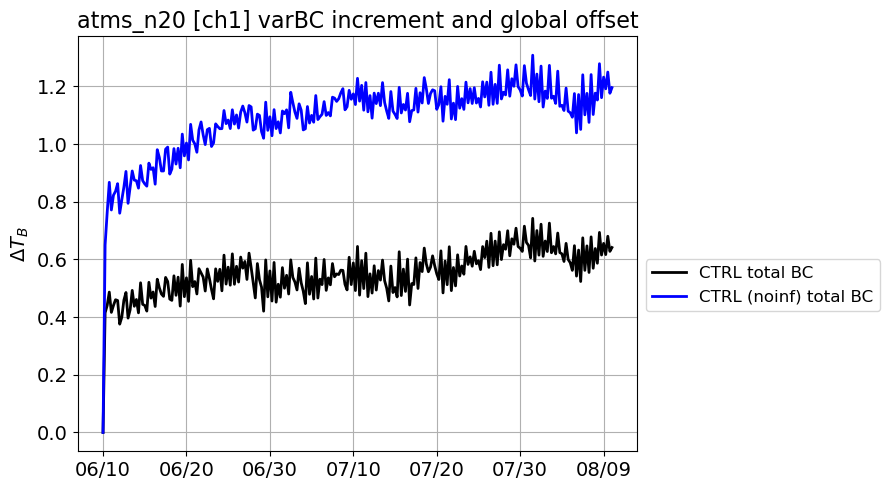

In [12]:
# Plot several exps' total increment (only)

exp_list=exps
exp_list_short = [short_name[exp] for exp in exp_list]

save_figure=True
fig_dir=f'/home/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/total_inc_timeseries/full_cycled_mode/{sensor}'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


plt_legend=True

fig, ax = plt.subplots(figsize=(9,5))

for e, exp in enumerate(exp_list):
    if e==0: 
        plt_color='black'
    elif e==1:
        plt_color='blue'
    elif e==2:
        plt_color='green'
    elif e==3:
        plt_color='orange'
    elif e==4:
        plt_color='purple'
    elif e==5:
        plt_color='gray'
    elif e==6:
        plt_color='cyan'

    ax.plot(datetime[:nt], total_bc_inc[exp][:nt],  linestyle='-', label=f'{short_name[exp]} total BC', color=plt_color, linewidth=2)
    #ax.plot(datetime[:nt], global_offset[exp][:nt], linestyle='--',  label=f'{short_name[exp]} global offset',color=plt_color, linewidth=2)

interval = 40
ticks_to_show = datetime[::interval]

if plt_legend: 
    ax.legend(loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=10.5)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
#ax.set_xticklabels(ticks_labels, rotation=0, ha='right',fontsize=12)
ymin = plt.gca().get_ylim()[0]*1.35
ymax = plt.gca().get_ylim()[1]*1.35

'''
if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)
'''

#ax.set_ylim(-0.35,0.35)
#ax.set_ylim(-0.4,0.6)
#ax.set_ylim(-1,1)
#ax.set_ylim(-0.8,1.1)
#ax.set_ylim(-2,-0)

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta T_B$',fontsize=14)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] varBC increment and global offset',fontsize=16)

plt.tight_layout()
if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/total_inc_and_global_offset_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/total_inc_and_global_offset_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}.png")

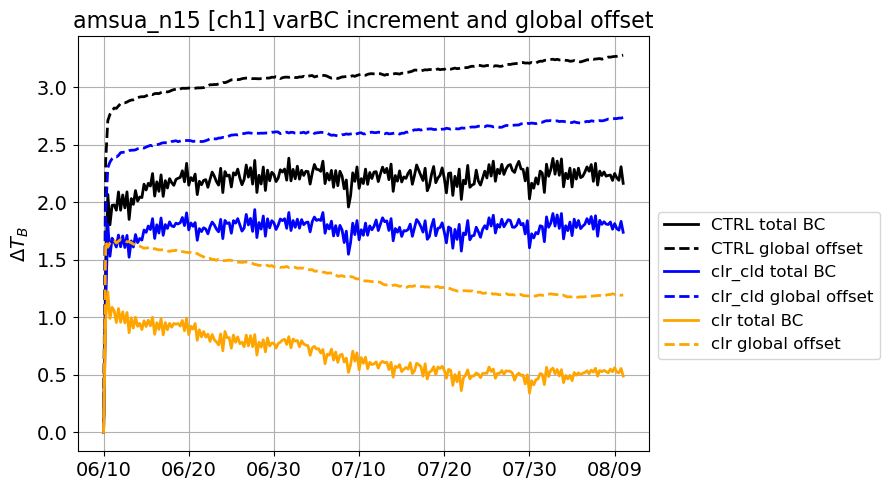

In [207]:
# Plot several exps' total increment vs global offset

exp_list=exps
exp_list_short = [short_name[exp] for exp in exp_list]

save_figure=False
fig_dir=f'/home/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/total_inc_and_global_offset_timeseries/full_cycled_mode/{sensor}'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


plt_legend=True

fig, ax = plt.subplots(figsize=(9,5))

for e, exp in enumerate(exp_list):
    if e==0: 
        plt_color='black'
    elif e==1:
        plt_color='blue'
    elif e==2:
        plt_color='green'
    elif e==3:
        plt_color='orange'
    elif e==4:
        plt_color='purple'
    elif e==5:
        plt_color='gray'
    elif e==6:
        plt_color='cyan'

    ax.plot(datetime[:nt], total_bc_inc[exp][:nt],  linestyle='-', label=f'{short_name[exp]} total BC', color=plt_color, linewidth=2)
    ax.plot(datetime[:nt], global_offset[exp][:nt], linestyle='--',  label=f'{short_name[exp]} global offset',color=plt_color, linewidth=2)

interval = 40
ticks_to_show = datetime[::interval]

if plt_legend: 
    ax.legend(loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=10.5)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
#ax.set_xticklabels(ticks_labels, rotation=0, ha='right',fontsize=12)
ymin = plt.gca().get_ylim()[0]*1.35
ymax = plt.gca().get_ylim()[1]*1.35

'''
if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)
'''

#ax.set_ylim(-0.35,0.35)
#ax.set_ylim(-0.4,0.6)
#ax.set_ylim(-1,1)
#ax.set_ylim(-0.8,1.1)
#ax.set_ylim(-2,-0)

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta T_B$',fontsize=14)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] varBC increment and global offset',fontsize=16)

plt.tight_layout()
if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/total_inc_and_global_offset_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/total_inc_and_global_offset_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}.png")

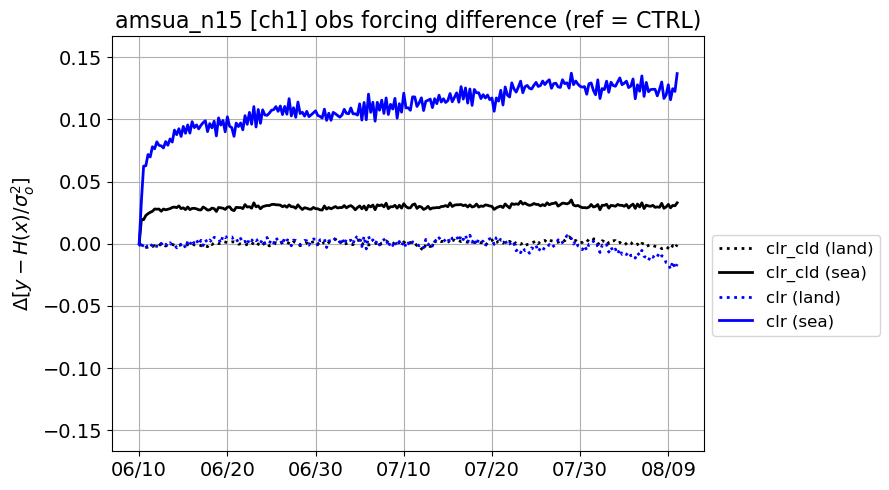

In [208]:
# Compare the difference of obs forcing (sea vs land)

expref = 'full_CTRL'

exp_list=[exp for exp in exps if exp!= expref]
exp_list_short = [short_name[exp] for exp in exp_list]

save_figure=False
fig_dir=f'/home/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/obs_forcing/full_cycled_mode/{sensor}'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


plt_legend=True

fig, ax = plt.subplots(figsize=(9,5))

for e, exp in enumerate(exp_list):
    if e==0: 
        plt_color='black'
    elif e==1:
        plt_color='blue'
    elif e==2:
        plt_color='green'
    elif e==3:
        plt_color='orange'
    elif e==4:
        plt_color='purple'
    elif e==5:
        plt_color='gray'
    elif e==6:
        plt_color='cyan'

    #ax.plot(datetime[:nt], -(np.array(varbc_norminc[exp][:nt])      - np.array(varbc_norminc[expref][:nt])),  linestyle='-', label=f'{short_name[exp]} norm inc (global)', color=plt_color, linewidth=2)
    ax.plot(datetime[:nt], -(np.array(varbc_norminc_land[exp][:nt]) - np.array(varbc_norminc_land[expref][:nt])), linestyle=':',  label=f'{short_name[exp]} (land)',color=plt_color, linewidth=2)
    ax.plot(datetime[:nt], -(np.array(varbc_norminc_sea[exp][:nt])  - np.array(varbc_norminc_sea[expref][:nt])), linestyle='-',  label=f'{short_name[exp]} (sea)',color=plt_color, linewidth=2)

interval = 40
ticks_to_show = datetime[::interval]

if plt_legend: 
    ax.legend(loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=12, ncol=1, bbox_to_anchor=(1, 0.4))
    #ax.legend(loc='best', fontsize=10.5)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
#ax.set_xticklabels(ticks_labels, rotation=0, ha='right',fontsize=12)
ymin = plt.gca().get_ylim()[0]*1.15
ymax = plt.gca().get_ylim()[1]*1.15
yrange = max(abs(ymin), abs(ymax))
ax.set_ylim(-yrange, yrange)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta [y-H(x)/\sigma_o^2]$',fontsize=14)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] obs forcing difference (ref = {short_name[expref]})',fontsize=16)

plt.tight_layout()
if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/del_obs_forcing_timeseries_{'-'.join(exp_list_short)}-ref_{short_name[expref]}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/del_obs_forcing_timeseries_{'-'.join(exp_list_short)}-ref_{short_name[expref]}_{sensor}_{chanl}.png")

In [87]:
if chanl.split('ch')[1] in ('1',2,3):
    print('a')

a


In [ ]:
varbc_norminc[exp][:nt]

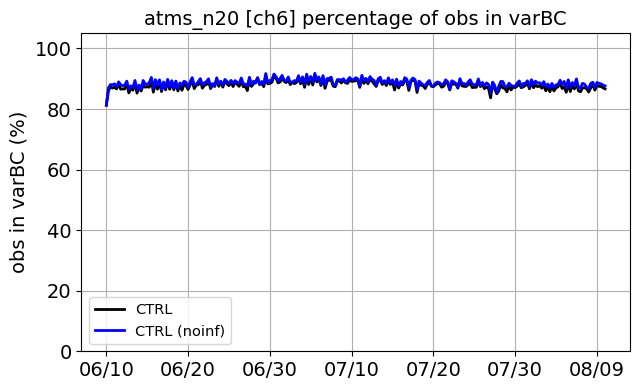

In [126]:
# Plot several exps' varbc obs percentage

exp_list = exps
exp_list_short = [short_name[exp] for exp in exp_list]

plt_legend=True
save_figure=True

fig_dir=f'/home/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/percentage_obs_in_varbc/full_cycled_mode/{sensor}'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")

ylim_low= 0

fig, ax = plt.subplots(figsize=(6.5,4))

for e, exp in enumerate(exp_list):
    if e==0: 
        plt_color='black'
    elif e==1:
        plt_color='blue'
    elif e==2:
        plt_color='green'
    elif e==3:
        plt_color='orange'
    elif e==4:
        plt_color='purple'
    elif e==5:
        plt_color='gray'
    elif e==6:
        plt_color='cyan'
        
    varbc_percentage=np.array(obs_num_varbc[exp][:nt]) / np.array(obs_num_total[exp][:nt])*100
    ax.plot(datetime[:nt], varbc_percentage, linestyle='-', color=plt_color, linewidth=2, label=f'{short_name[exp]}')
interval = 40
ticks_to_show = datetime[::interval]
ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('obs in varBC (%)',fontsize=14)
ax.set_ylim(ylim_low,105)

if plt_legend: 
#    ax.legend(loc='best', fontsize=10.5, ncol=1, bbox_to_anchor=(1, 0.4))
    ax.legend(loc='best', fontsize=10.5, ncol=1)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] percentage of obs in varBC',fontsize=14)

plt.tight_layout()

if save_figure:
    if plt_legend:
        plt.savefig(f"{fig_dir}/percentage_obs_in_varbc_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")
    else:
        plt.savefig(f"{fig_dir}/percentage_obs_in_varbc_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}.png")

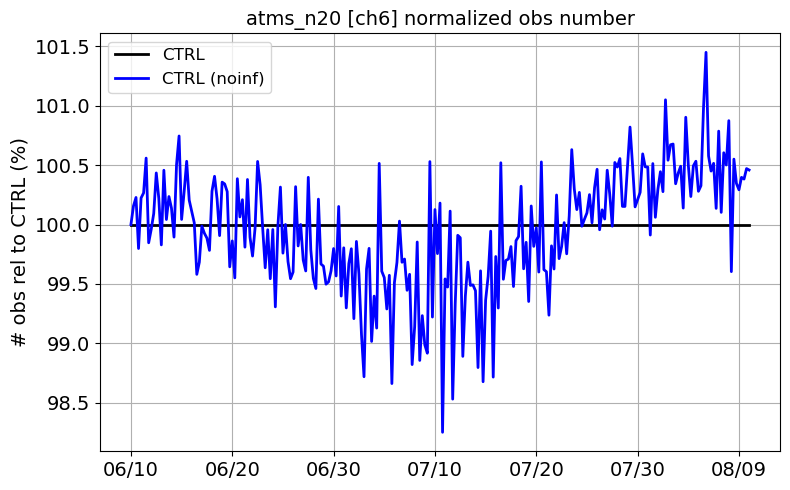

In [127]:
# PLot the relative obs num:

expref='full_CTRL'
expnorm_list = exps

exp_list_short = [short_name[exp] for exp in expnorm_list]


plt_legend=True
save_figure=True

fig_dir=f'/home/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/norm_obs/full_cycled_mode/{sensor}'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
    
fig, ax = plt.subplots(figsize=(8,5))

obs_num_norm = {};
for e, exp in enumerate(expnorm_list):
    if e==0: 
        plt_color='black'
    elif e==1:
        plt_color='blue'
    elif e==2:
        plt_color='green'
    elif e==3:
        plt_color='orange'
    elif e==4:
        plt_color='purple'
    elif e==5:
        plt_color='gray'
    elif e==6:
        plt_color='cyan'
        
    obs_num_norm[exp] = np.array(obs_num_total[exp][:nt]) / np.array(obs_num_total[expref][:nt])*100
    ax.plot(datetime, obs_num_norm[exp], linewidth=2, color=plt_color, label=f'{short_name[exp]}')

if plt_legend: 
    #ax.legend(loc='best', bbox_to_anchor=(1, 0.4))
    ax.legend(loc='best',fontsize=12)

ax.grid(True)
interval = 40
ticks_to_show = datetime[::interval]
ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(f'# obs rel to {short_name[expref]} (%)',fontsize=14)
ax.set_title(f'{sensor} [{chanl}] normalized obs number',fontsize=14)

plt.tight_layout()

if save_figure:
    plt.savefig(f"{fig_dir}/norm_obs_num_timeseries_{'_'.join(exp_list_short)}_{sensor}_{chanl}_legend.png")


In [97]:
# cloud predictor analysis:

save_figure=True

fig_dir=f'/home/Chih-Chi.Hu/python_codes/figures/varBC_coeff_analysis/varbc_cloudpred_inc_Hovemoller/full_cycled_mode/{sensor}'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")
    

'''
exp_list = ['clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc', 'clr_clr_and_cld_cld_0.05_varbcpred_obs_cld', \
            'clr_clr_and_cld_cld_0.05_varbcpred_model_cld_nobc' ]

exp_list = ['full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc', 'full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld', \
            'full_clr_clr_and_cld_cld_0.05_varbcpred_model_cld_nobc' ]
'''

exp_list = ['full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc', 'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_clwnbc' ]

if chanl == 'ch5':
    vmin=-0.5
    vmax= 0.5
elif chanl == 'ch4':
    vmin= -2
    vmax=  2
else:
    vmin=-5
    vmax= 5

dx = 0.01
x_grid = np.arange(0,1+dx,dx)
nx = len(x_grid)

cld_fn = {};
for exp in exp_list:
    nt = len(cloud_pred[exp])
    cld_fn[exp] = np.zeros((nt,nx))
    
    for tt in range(nt):
        cld_fn[exp][tt,:] = cloud_pred[exp][tt][0]*x_grid    + \
                            cloud_pred[exp][tt][1]*x_grid**2 + \
                            cloud_pred[exp][tt][2]*x_grid**3 + \
                            cloud_pred[exp][tt][3]*x_grid**4 

# Plot Section -- symmetric cloud
try:
    matching_exps = [exp for exp in exp_list if 'sym' in exp]
except IndexError:  # This catches the case where no matching item is found
    pass
else:
    for matching_exp in matching_exps:
        xs, ts = np.meshgrid(x_grid, np.arange(0,nt))

        fig, ax = plt.subplots(figsize=(5.5,6.5))
        contour = ax.pcolormesh(xs, ts, cld_fn[matching_exp], cmap='RdBu_r', vmin=vmin, vmax=vmax)

        interval = 20
        ticks_to_show = np.arange(0,nt)[::interval]
        ax.set_yticks(ticks_to_show)

        ticks_to_show = datetime[::interval]
        ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
        ax.set_yticklabels(ticks_labels, rotation=0,fontsize=13)
        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlabel('symmetric cloud', fontsize=15)

        ax.grid(True)
        ax.set_title(rf'{sensor} [{chanl}] $\Delta T_B$ from cloud [{short_name[matching_exp]}]',fontsize=14.5)

        cbar = fig.colorbar(contour,location='right',aspect=40)
        cbar.set_label(r'$\Delta T_B$ (K)',fontsize=14)

        plt.tight_layout()
        if save_figure:
            plt.savefig(f"{fig_dir}/cloud_pred_inc_{sensor}_{chanl}_{short_name[matching_exp]}.png")

# Plot Section -- observation cloud
try:
    matching_exps = [exp for exp in exp_list if 'obs' in exp]
except IndexError:  # This catches the case where no matching item is found
    pass
else:
    xs, ts = np.meshgrid(x_grid, np.arange(0,nt))
    
    for matching_exp in matching_exps:
        fig, ax = plt.subplots(figsize=(5.5,6.5))
        contour = ax.pcolormesh(xs, ts, cld_fn[matching_exp], cmap='RdBu_r', vmin=vmin, vmax=vmax)

        interval = 20
        ticks_to_show = np.arange(0,nt)[::interval]
        ax.set_yticks(ticks_to_show)

        ticks_to_show = datetime[::interval]
        ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
        ax.set_yticklabels(ticks_labels, rotation=0,fontsize=13)
        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlabel('obs cloud', fontsize=15)

        ax.grid(True)
        ax.set_title(rf'{sensor} [{chanl}] $\Delta T_B$ from cloud [{short_name[matching_exp]}]',fontsize=14.5)

        cbar = fig.colorbar(contour,location='right',aspect=40)
        cbar.set_label(r'$\Delta T_B$ (K)',fontsize=14)

        plt.tight_layout()
        if save_figure:
            plt.savefig(f"{fig_dir}/cloud_pred_inc_{sensor}_{chanl}_{short_name[matching_exp]}.png")

# Plot Section -- model cloud
try:
    matching_exps = [exp for exp in exp_list if 'model' in exp][0]
except IndexError:  # This catches the case where no matching item is found
    pass
else:
    xs, ts = np.meshgrid(x_grid, np.arange(0,nt))

    for matching_exp in matching_exps:
        fig, ax = plt.subplots(figsize=(5.5,6.5))
        contour = ax.pcolormesh(xs, ts, cld_fn[matching_exp], cmap='RdBu_r', vmin=vmin, vmax=vmax)

        interval = 20
        ticks_to_show = np.arange(0,nt)[::interval]
        ax.set_yticks(ticks_to_show)

        ticks_to_show = datetime[::interval]
        ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
        ax.set_yticklabels(ticks_labels, rotation=0,fontsize=13)
        ax.tick_params(axis='both', labelsize=13)
        ax.set_xlabel('model cloud', fontsize=15)

        ax.grid(True)
        ax.set_title(rf'{sensor} [{chanl}] $\Delta T_B$ from cloud [{short_name[matching_exp]}]',fontsize=14.5)

        cbar = fig.colorbar(contour,location='right',aspect=40)
        cbar.set_label(r'$\Delta T_B$ (K)',fontsize=14)

        plt.tight_layout()
        if save_figure:
            plt.savefig(f"{fig_dir}/cloud_pred_inc_{sensor}_{chanl}_{short_name[matching_exp]}.png")


KeyError: 'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc'

In [254]:
matching_exp = [exp for exp in exp_list if 'sym' in exp]

In [99]:
matching_exp

['full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc',
 'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_clwnbc']

In [ ]:
# Plot global offset and its variance (maybe only plot one experiment at a time?! just for demo)

exp_list=['ctrl','ctrl_noinf']
plt_legend=True

fig, ax = plt.subplots(figsize=(7,4))

for exp in exp_list:
    ax.plot(datetime[:nt], global_offset[exp][:nt], label=f'{exp}', linewidth=2)
    
interval = 20
ticks_to_show = datetime[::interval]
    
ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)

'''
ymin = plt.gca().get_ylim()[0]
ymax = plt.gca().get_ylim()[1]

if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)
'''

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('global offset coefficient',fontsize=14)
if plt_legend: 
    ax.legend(loc='center right', fontsize=12)

# ax2: for standard deviation:
ax2 = ax.twinx()
for exp in exp_list:
    ax2.plot(datetime[:nt], global_offset_var[exp][:nt], linestyle=':', linewidth=2)
    
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel('global offset variance',fontsize=14)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] varBC global offset',fontsize=14)

plt.tight_layout()
plt.savefig(f"global_offset_and_its_variance_timeseries_{'_'.join(exp_list)}_{sensor}_{chanl}_legend.png")


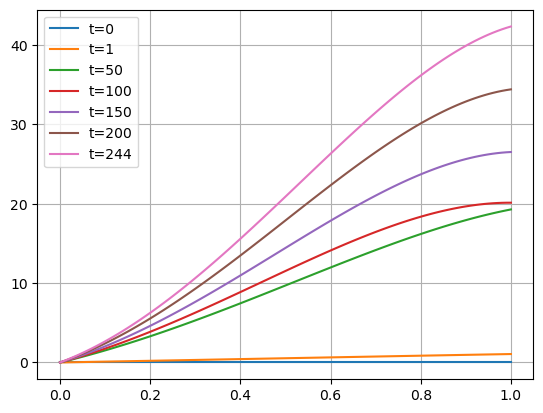

In [26]:
#expplot = 'clr_clr_and_cld_cld_0.05_varbcpred_obs_cld'
expplot = 'full_clr_clr_and_cld_cld_0.05_varbcpred_obs_cld'

plt.plot(x_grid, cld_fn[expplot][0,:], label='t=0')
plt.plot(x_grid, cld_fn[expplot][1,:], label='t=1')
'''
plt.plot(x_grid, cld_fn[expplot][2,:], label='t=2')
plt.plot(x_grid, cld_fn[expplot][3,:], label='t=3')
plt.plot(x_grid, cld_fn[expplot][4,:], label='t=4')
plt.plot(x_grid, cld_fn[expplot][5,:], label='t=5')
plt.plot(x_grid, cld_fn[expplot][6,:], label='t=6')
plt.plot(x_grid, cld_fn[expplot][7,:], label='t=7')
plt.plot(x_grid, cld_fn[expplot][8,:], label='t=8')
plt.plot(x_grid, cld_fn[expplot][9,:], label='t=9')
'''
plt.plot(x_grid, cld_fn[expplot][50,:], label='t=50')
plt.plot(x_grid, cld_fn[expplot][100,:], label='t=100')
plt.plot(x_grid, cld_fn[expplot][150,:], label='t=150')
plt.plot(x_grid, cld_fn[expplot][200,:], label='t=200')
plt.plot(x_grid, cld_fn[expplot][244,:], label='t=244')

plt.grid(True)
plt.legend()

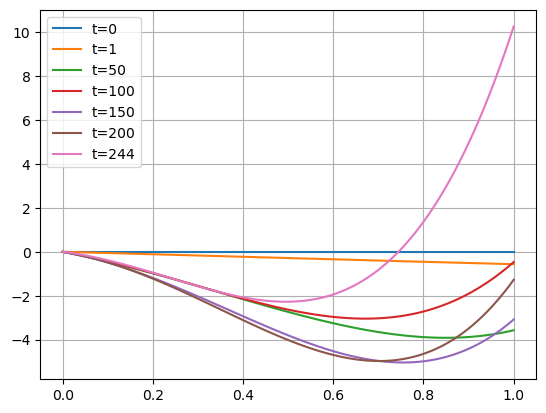

In [27]:

expplot = 'full_clr_clr_and_cld_cld_0.05_varbcpred_model_cld_nobc'
#expplot = 'clr_clr_and_cld_cld_0.05_varbcpred_model_cld_nobc'

plt.plot(x_grid, cld_fn[expplot][0,:], label='t=0')
plt.plot(x_grid, cld_fn[expplot][1,:], label='t=1')
'''
plt.plot(x_grid, cld_fn[expplot][2,:], label='t=2')
plt.plot(x_grid, cld_fn[expplot][3,:], label='t=3')
plt.plot(x_grid, cld_fn[expplot][4,:], label='t=4')
plt.plot(x_grid, cld_fn[expplot][5,:], label='t=5')
plt.plot(x_grid, cld_fn[expplot][6,:], label='t=6')
plt.plot(x_grid, cld_fn[expplot][7,:], label='t=7')
plt.plot(x_grid, cld_fn[expplot][8,:], label='t=8')
plt.plot(x_grid, cld_fn[expplot][9,:], label='t=9')
'''
plt.plot(x_grid, cld_fn[expplot][50,:], label='t=50')
plt.plot(x_grid, cld_fn[expplot][100,:], label='t=100')
plt.plot(x_grid, cld_fn[expplot][150,:], label='t=150')
plt.plot(x_grid, cld_fn[expplot][200,:], label='t=200')
plt.plot(x_grid, cld_fn[expplot][244,:], label='t=244')

plt.grid(True)
plt.legend()

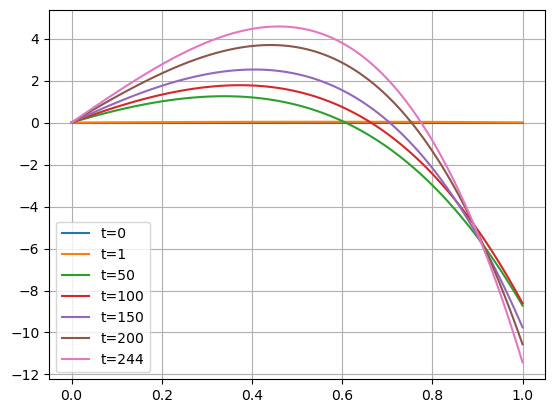

In [28]:

expplot = 'full_clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc'
#expplot = 'clr_clr_and_cld_cld_0.05_varbcpred_sym_cld_nobc'

plt.plot(x_grid, cld_fn[expplot][0,:], label='t=0')
plt.plot(x_grid, cld_fn[expplot][1,:], label='t=1')
'''
plt.plot(x_grid, cld_fn[expplot][2,:], label='t=2')
plt.plot(x_grid, cld_fn[expplot][3,:], label='t=3')
plt.plot(x_grid, cld_fn[expplot][4,:], label='t=4')
plt.plot(x_grid, cld_fn[expplot][5,:], label='t=5')
plt.plot(x_grid, cld_fn[expplot][6,:], label='t=6')
plt.plot(x_grid, cld_fn[expplot][7,:], label='t=7')
plt.plot(x_grid, cld_fn[expplot][8,:], label='t=8')
plt.plot(x_grid, cld_fn[expplot][9,:], label='t=9')
'''
plt.plot(x_grid, cld_fn[expplot][50,:], label='t=50')
plt.plot(x_grid, cld_fn[expplot][100,:], label='t=100')
plt.plot(x_grid, cld_fn[expplot][150,:], label='t=150')
plt.plot(x_grid, cld_fn[expplot][200,:], label='t=200')
plt.plot(x_grid, cld_fn[expplot][244,:], label='t=244')

plt.grid(True)
plt.legend()

In [ ]:
# Plot the total observation number vs varbc observation number (new added: 2024/08/22)
if total_bc:
    fig, ax = plt.subplots(figsize=(7,4.5))
    for e, exp in enumerate(exps):
        if e==0: 
            plt_color='blue'
        elif e==1:
            plt_color='red'
        ax.plot(datetime[:nt], obs_num_total[exp][:nt],color=plt_color, linestyle='-', linewidth=1.5)
        
    interval = 20
    ticks_to_show = datetime[::interval]

    ax.set_xticks(ticks_to_show)
    ax.set_xticklabels(ticks_to_show, rotation=45, ha='right',fontsize=13)    
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel('# obs',fontsize=14)
    
    ax2 = ax.twinx()
    for e, exp in enumerate(exps):
        if e==0: 
            plt_color='blue'
        elif e==1:
            plt_color='red'
        varbc_percentage=np.array(obs_num_varbc[exp][:nt]) / np.array(obs_num_total[exp][:nt])*100
        ax2.plot(datetime[:nt], varbc_percentage, linestyle='--',marker='+', color=plt_color, linewidth=1.5)

    ax2.tick_params(axis='y', labelsize=14)
    ax2.set_ylabel('obs in varBC (%)',fontsize=14)
    ax2.set_ylim(80,100)

    #ax.legend(loc='upper left', fontsize=8.5)

    ax.grid(True)
    ax.set_title(f'{sensor}    {chanl}',fontsize=16)

    plt.tight_layout()
    plt.savefig(f"total_obsnum_varbc_obsnum_timeseries_ctrl_ctrl_noinf_{sensor}_{chanl}.png")


In [ ]:
# Plot only total increment 
# designed for comparing with or without inflation

exp_list =['ctrl', \
           'only_clr_clr', \
           'clr_clr_and_cld_cld_0.05', \
           'clr_clr_and_cld_cld_0.05_varbcpred_obs_cld']
exp_list_noinf =[ 'ctrl_noinf', \
                  'only_clr_clr_noinf', \
                  'clr_clr_and_cld_cld_0.05_noinf', \
                  'clr_clr_and_cld_cld_0.05_varbcpred_obs_cld_noinf']

save_figure=True

fig, ax = plt.subplots(figsize=(8,4))

for e, exp in enumerate(exp_list):
    if e==0: 
        plt_color=(70/255, 70/255, 70/255)
        label = 'ctrl'
    elif e==1:
        plt_color=(0, 102/255, 204/255)
        label = 'only_clr'        
    elif e==2:
        plt_color=(76/255, 153/255, 0)
        label = 'clr_and_cld'
    elif e==3:
        plt_color=(204/255, 102/255, 0)
        label = 'clr_and_cld_pred_obs'
        
    ax.plot(datetime[:nt], total_bc_inc[exp][:nt],  linestyle='-', label=f'{label}', color=plt_color, linewidth=2)
    
for e, exp in enumerate(exp_list_noinf):
    if e==0: 
        plt_color=(70/255, 70/255, 70/255)
        label = 'ctrl'
    elif e==1:
        plt_color=(0, 102/255, 204/255)
        label = 'only_clr'        
    elif e==2:
        plt_color=(76/255, 153/255, 0)
        label = 'clr_and_cld'
    elif e==3:
        plt_color=(204/255, 102/255, 0)
        label = 'clr_and_cld_pred_obs'
        
    ax.plot(datetime[:nt], total_bc_inc[exp][:nt],  linestyle='--', label=f'{label}-noinf', color=plt_color, linewidth=1.5)

interval = 20
ticks_to_show = datetime[::interval]

#ax.legend(loc='best', fontsize=10.5, ncol=1, bbox_to_anchor=(1, 0.4))
ax.legend(loc='best', fontsize=10.5, ncol=2)

ax.set_xticks(ticks_to_show)
ticks_labels = [f'{dt[4:6]}/{dt[6:8]}' for dt in ticks_to_show]
ax.set_xticklabels(ticks_labels, rotation=0,fontsize=14)

#ymin = plt.gca().get_ylim()[0]*1.5
#ymax = plt.gca().get_ylim()[1]*1.5
if sensor == 'amsua_n15':
    if chanl =='ch1':      ax.set_ylim([ -0.5, 5.0])
    elif chanl == 'ch2':   ax.set_ylim([ -1.5, 3.5])
    elif chanl == 'ch3':   ax.set_ylim([    0, 3.0])
    elif chanl == 'ch4':   ax.set_ylim([ -0.6, 0.4])
    elif chanl == 'ch5':   ax.set_ylim([-0.25, 0.1])
    elif chanl == 'ch6':   ax.set_ylim([ -3.0, 0.0])
    elif chanl == 'ch15':  ax.set_ylim([ -1.5, 4.5])
elif sensor == 'atms_n20':
    if chanl =='ch1':      ax.set_ylim([ -2.5, 3.0])
    elif chanl == 'ch2':   ax.set_ylim([ -2.0, 2.5])
    elif chanl == 'ch3':   ax.set_ylim([ -1.5, 1.0])
    elif chanl == 'ch4':   ax.set_ylim([ -2.0, 0.0])
    elif chanl == 'ch5':   ax.set_ylim([ -1.3, -0.4])
    elif chanl == 'ch6':   ax.set_ylim([ -0.6, -0.2])
    elif chanl == 'ch16':  ax.set_ylim([ -2.5, 3.0])    
    elif chanl == 'ch17':  ax.set_ylim([ -1.5, 0.5])    
    elif chanl == 'ch18':  ax.set_ylim([ -1.6, -0.8])    
    elif chanl == 'ch19':  ax.set_ylim([ -1.4, -0.4])    
    elif chanl == 'ch20':  ax.set_ylim([ -1.4, -0.4])    
    elif chanl == 'ch21':  ax.set_ylim([ -1.4, -0.4])    
    elif chanl == 'ch22':  ax.set_ylim([ -1.0, -0.3])    

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel(r'$\Delta T_B$',fontsize=14)

ax.grid(True)
ax.set_title(f'{sensor} [{chanl}] varBC increment',fontsize=14)

plt.tight_layout()
if save_figure:
    plt.savefig(f"total_inc_inf_vs_noinf_{sensor}_{chanl}.png")

In [ ]:
# optional block::
# note that compiled stats read from gsistat are "prior" coefficients, 
# while from abias or abias_pc files are "posterior" coefficients
# so be cautious that there might be a time shift!

del global_offset['init_bc_var'][0]
del global_offset_var['init_bc_var'][0]
nt = nt-1

In [ ]:
# plot the coefficients between several experiments

fig, ax = plt.subplots(figsize=(7,4.5))

for exp in exps:
    ax.plot(datetime[:nt], global_offset[exp][:nt], label=f'{exp}', linewidth=2)
    
interval = 20
ticks_to_show = datetime[::interval]
    
ax.set_xticks(ticks_to_show)
ax.set_xticklabels(ticks_to_show, rotation=45, ha='right',fontsize=13)

ymin = plt.gca().get_ylim()[0]
ymax = plt.gca().get_ylim()[1]


if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)


ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('Global offset coefficient',fontsize=14)

ax.legend(fontsize=14)
ax.grid(True)

ax.set_title(f'{sensor}    {chanl}',fontsize=16)

plt.tight_layout()
#plt.savefig(f"varbc_coeff_cycling_{sensor}_{chanl}.png")


In [ ]:
if total_bc:
    datetime=[];
    total_bc_inc={};
    global_offset={};
    obs_num_total={};
    obs_num_varbc={};

    for i, exp in enumerate(exps):
        total_bc_inc[exp]=[];
        global_offset[exp]=[];
        obs_num_total[exp]=[];
        obs_num_varbc[exp]=[];

        with open(fn[exp], 'r') as file:
            for j, line in enumerate(file):
                parts = line.split()
                if i==0:
                    datetime.append(parts[0])

                total_bc_inc[exp].append(float(parts[3]))
                global_offset[exp].append(float(parts[4]))
                obs_num_total[exp].append(float(parts[5]))
                obs_num_varbc[exp].append(float(parts[6]))


    nt = len(datetime)
    
else:   
    datetime=[];
    global_offset={};
    global_offset_var={};

    for i, exp in enumerate(exps):
        global_offset[exp]=[];
        global_offset_var[exp]=[];

        with open(fn[exp], 'r') as file:
            for j, line in enumerate(file):
                parts = line.split()
                #if i==0:
                if i==2:
                    datetime.append(parts[0])

                global_offset[exp].append(float(parts[3]))
                global_offset_var[exp].append(float(parts[4]))
    nt = len(datetime)

In [ ]:
# Plot several(?) exps' varbc obs percentage
exp_list=['ctrl','ctrl_noinf','only_clr_clr']
ylim_low= 20

fig, ax = plt.subplots(figsize=(8.5,4.5))
for e, exp in enumerate(exp_list):
    if e==0: 
        plt_color='blue'
    elif e==1:
        plt_color='red'
    elif e==2:
        plt_color='green'
        
    ax.plot(datetime[:nt], obs_num_total[exp][:nt],color=plt_color, linestyle='-', linewidth=1.5, label=f'{exp}')

interval = 20
ticks_to_show = datetime[::interval]

ax.set_xticks(ticks_to_show)
ax.set_xticklabels(ticks_to_show, rotation=45, ha='right',fontsize=13)    
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('# obs',fontsize=14)

ax2 = ax.twinx()
for e, exp in enumerate(exp_list):
    if e==0: 
        plt_color='blue'
    elif e==1:
        plt_color='red'
    elif e==2:
        plt_color='green'
        
    varbc_percentage=np.array(obs_num_varbc[exp][:nt]) / np.array(obs_num_total[exp][:nt])*100
    ax2.plot(datetime[:nt], varbc_percentage, linestyle='--',marker='+', color=plt_color, linewidth=1.5, label=f'{exp}')

ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel('obs in varBC (%)',fontsize=14)
ax2.set_ylim(ylim_low,100)

ax.legend(loc='best', fontsize=8.5, ncol=1)
ax.grid(True)
ax.set_title(f'{sensor}    {chanl}',fontsize=16)

plt.tight_layout()
#plt.savefig(f"total_obsnum_varbc_obsnum_timeseries_ctrl_ctrl_noinf_{sensor}_{chanl}.png")


In [ ]:
# plot the coefficient and the stdev (new added 2024/08/15)

fig, ax = plt.subplots(figsize=(7,4.5))

for exp in exps:
    ax.plot(datetime[:nt], global_offset[exp][:nt], label=f'{exp}', linewidth=2)
    
interval = 20
ticks_to_show = datetime[::interval]
    
ax.set_xticks(ticks_to_show)
ax.set_xticklabels(ticks_to_show, rotation=45, ha='right',fontsize=13)
ymin = plt.gca().get_ylim()[0]
ymax = plt.gca().get_ylim()[1]

'''
if (ymin+ymax)>0:
    ax.set_ylim(bottom=0, top=ymax)
else:
    ax.set_ylim(bottom=ymin, top=0)
'''

ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('Global offset coefficient',fontsize=14)
ax.legend(loc='center right', fontsize=12)

# ax2: for standard deviation:
ax2 = ax.twinx()
for exp in exps:
    ax2.plot(datetime[:nt], np.sqrt(global_offset_var[exp][:nt]), linestyle=':', linewidth=2)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=14)
ax2.set_ylabel('Global offset stdev',fontsize=14)

ax.grid(True)
ax.set_title(f'{sensor}    {chanl}',fontsize=16)

plt.tight_layout()

#plt.savefig(f"varbc_coeff_and_stdev_timeseries_ctrl_ctrl_noinf_gfs_{sensor}_{chanl}.png")
plt.savefig(f"varbc_coeff_and_stdev_timeseries_ctrl_ctrl_noinf_init_bc_var_{sensor}_{chanl}.png")
